In [1]:
import matplotlib.pyplot as plt
import time
from mesa.batchrunner import batch_run
import pandas as pd
import numpy as np
%matplotlib inline

from model2 import SchellingModel


C:\Users\allen\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In the following notebook we will test the Schelling Model over different relocation policies. 
The tests are structured in the following way:
* We start by defining, for each attribute of the model, all the values that we will try.
* In each test, done through a batch run, we choose one attribute whose value will vary and we fix all the remaining attributes to a default value, in order to see how the model behaves by varying a single attribute per time, so how each attribute influence the middle and final results. For each attribute, the value that is fixed is usually a median value in the set defined for it 

In [6]:
#FOR EACH ATTRIBUTE, SET OF VALUES THAT WE WILL TRY 
homophily_set = [0.2, 0.4, 0.6, 0.8]
neighborhood_set = ['abs',"rel"]
side_set = [20,40,60]
density_set = [0.2, 0.4, 0.6, 0.8]
minority_set = [0.2, 0.4, 0.6, 0.8]

#DEFAULT VALUE FOR EACH ATTRIBUTE
#homophily default = 0.4
#neighborhood_type default = rel
#side default = 40
#density default = 0.6
#minority default = 0.4

The neighborhood considered is always the Moore neighborhood.

* Neighborhood type = abs (absolute) means that for each agent, when we compute its happiness, we do NUM_similar_agents/8

* Neighborhood type = rel (relative) means that for each agent, when we compute its happiness, we do NUM_similar_agents/NUM_agents_in_its_neighborhood



Each batch run performs the following steps:
* Define parameter values (parameters whose value will change are defined by a list, others that remain fixed are defined by a single value)
* Start the batch run
* Save the results into a csv file
* Load the csv file
* Plot of the results showing the behaviours

* NB: since the batch run could require a large exectuion time, the csv file produced are provided in the folder and loaded. 

In the following graphs we will see how the execution time and the average segregation change (average of the segregation value of all the agents in a given step) by varying the other parameters.

**FIXED SIDE-NEIGHBORHOOD_TYPE-DENSITY-MINORITY, VARY HOMOPHILY**

In [107]:
parameters = {"side": [40], "neighborhood_type":["rel"], "density": [0.6], "homophily": [0.2,0.4,0.6,0.8], 
              "minority_pc":[0.4],"relocation_policy":["pure_random","mild_random","max_gain","min_gain"],
              "skip_if_not_happy":True}


#Run a batch of 10 iterations for each of 8 configuration
results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 1,
    max_steps=200,
    number_processes=8,
    data_collection_period=1,
    display_progress=True,
)
df_sndm_h = pd.DataFrame(results)
df_sndm_h.to_csv('df_sndm_h_2.csv', index=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [06:01<00:00, 22.58s/it]


In [8]:
df1 = pd.read_csv('df_sndm_h_2.csv')  
#remove the attributes not used in the plot 
df1 = df1.drop(['skip_if_not_happy', 'x','y','iteration', "RunId"], axis=1)
df1

,Step,side,neighborhood_type,density,homophily,minority_pc,relocation_policy,perc_happy,tot_seg,elapsed_step_time,elapsed_total_time,AgentID,segregation
0,0,40,rel,0.6,0.2,0.4,pure_random,0.908999,0.545226,0.047338,0.000000,NaN,NaN
1,1,40,rel,0.6,0.2,0.4,pure_random,0.972700,0.602205,0.015630,0.000000,0.0,0.00
2,1,40,rel,0.6,0.2,0.4,pure_random,0.972700,0.602205,0.015630,0.000000,1.0,1.00
3,1,40,rel,0.6,0.2,0.4,pure_random,0.972700,0.602205,0.015630,0.000000,2.0,0.00
4,1,40,rel,0.6,0.2,0.4,pure_random,0.972700,0.602205,0.015630,0.000000,3.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189249,13,40,rel,0.6,0.6,0.4,min_gain,1.000000,0.931679,0.015523,321.458546,922.0,1.00
189250,13,40,rel,0.6,0.6,0.4,min_gain,1.000000,0.931679,0.015523,321.458546,923.0,1.00
189251,13,40,rel,0.6,0.6,0.4,min_gain,1.000000,0.931679,0.015523,321.458546,924.0,1.00
189252,13,40,rel,0.6,0.6,0.4,min_gain,1.000000,0.931679,0.015523,321.458546,925.0,1.00


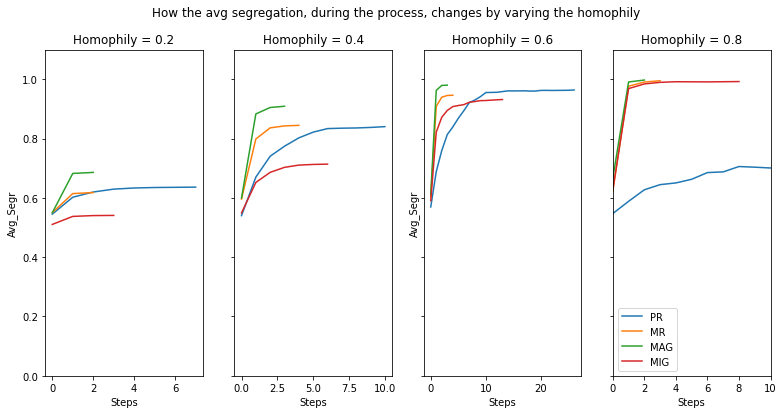

In [26]:
f, ax = plt.subplots(1,4, figsize=(13, 6), sharey = True)

p1 = df1[(df1["homophily"]==homophily_set[0])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[0].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[0].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[0].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[0].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[0].set_title('Homophily = 0.2')
ax[0].set_ylabel('Avg_Segr')
ax[0].set_xlabel('Steps')
###################################################

p1 = df1[(df1["homophily"]==homophily_set[1])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[1].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[1].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[1].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[1].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[1].set_title('Homophily = 0.4')
ax[1].set_xlabel('Steps')
####################################################

p1 = df1[(df1["homophily"]==homophily_set[2])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[2].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[2].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[2].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[2].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[2].set_title('Homophily = 0.6')
ax[2].set_xlabel('Steps')
ax[2].set_ylabel('Avg_Segr')
#################################################

p1 = df1[(df1["homophily"]==homophily_set[3])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[3].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[3].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[3].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[3].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')
ax[3].axis([0, 10, 0,1.1])

ax[3].set_title('Homophily = 0.8')
ax[3].set_xlabel('Steps')

f.suptitle('How the avg segregation, during the process, changes by varying the homophily')
plt.legend()

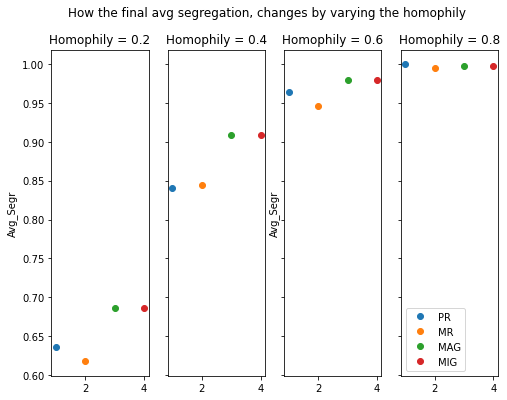

In [27]:
f, ax = plt.subplots(1,4, figsize=(8, 6), sharey = True)

p1 = df1[(df1["homophily"]==homophily_set[0])]

PR = p1[p1["relocation_policy"]=="pure_random"]
PR = PR.sort_values(by="Step")
PR.reset_index(drop=True, inplace=True)

MR = p1[p1["relocation_policy"]=="mild_random"]
MR = MR.sort_values(by="Step")
MR.reset_index(drop=True, inplace=True)

MAG = p1[p1["relocation_policy"]=="max_gain"]
MAG = MAG.sort_values(by="Step")
MAG.reset_index(drop=True, inplace=True)

MIG = p1[p1["relocation_policy"]=="min_gain"]
MIG = MIG.sort_values(by="Step")
MIG.reset_index(drop=True, inplace=True)

ax[0].plot(1,PR.iloc[-1]['tot_seg'],'o',  label='PR')
ax[0].plot(2, MR.iloc[-1]['tot_seg'], 'o', label='MR')
ax[0].plot(3,MAG.iloc[-1]['tot_seg'], 'o', label='MAG')
ax[0].plot(4, MAG.iloc[-1]['tot_seg'], 'o', label='MIG')

ax[0].set_title('Homophily = 0.2')
ax[0].set_ylabel('Avg_Segr')

###############################


p1 = df1[(df1["homophily"]==homophily_set[1])]

PR = p1[p1["relocation_policy"]=="pure_random"]
PR = PR.sort_values(by="Step")
PR.reset_index(drop=True, inplace=True)

MR = p1[p1["relocation_policy"]=="mild_random"]
MR = MR.sort_values(by="Step")
MR.reset_index(drop=True, inplace=True)

MAG = p1[p1["relocation_policy"]=="max_gain"]
MAG = MAG.sort_values(by="Step")
MAG.reset_index(drop=True, inplace=True)

MIG = p1[p1["relocation_policy"]=="min_gain"]
MIG = MIG.sort_values(by="Step")
MIG.reset_index(drop=True, inplace=True)

ax[1].plot(1,PR.iloc[-1]['tot_seg'],'o',  label='PR')
ax[1].plot(2, MR.iloc[-1]['tot_seg'], 'o', label='MR')
ax[1].plot(3,MAG.iloc[-1]['tot_seg'], 'o', label='MAG')
ax[1].plot(4, MAG.iloc[-1]['tot_seg'], 'o', label='MIG')

ax[1].set_title('Homophily = 0.4')

######################################################

p1 = df1[(df1["homophily"]==homophily_set[2])]

PR = p1[p1["relocation_policy"]=="pure_random"]
PR = PR.sort_values(by="Step")
PR.reset_index(drop=True, inplace=True)

MR = p1[p1["relocation_policy"]=="mild_random"]
MR = MR.sort_values(by="Step")
MR.reset_index(drop=True, inplace=True)

MAG = p1[p1["relocation_policy"]=="max_gain"]
MAG = MAG.sort_values(by="Step")
MAG.reset_index(drop=True, inplace=True)

MIG = p1[p1["relocation_policy"]=="min_gain"]
MIG = MIG.sort_values(by="Step")
MIG.reset_index(drop=True, inplace=True)

ax[2].plot(1,PR.iloc[-1]['tot_seg'],'o',  label='PR')
ax[2].plot(2, MR.iloc[-1]['tot_seg'], 'o', label='MR')
ax[2].plot(3,MAG.iloc[-1]['tot_seg'], 'o', label='MAG')
ax[2].plot(4, MAG.iloc[-1]['tot_seg'], 'o', label='MIG')

ax[2].set_title('Homophily = 0.6')
ax[2].set_ylabel('Avg_Segr')
########################################################

p1 = df1[(df1["homophily"]==homophily_set[3])]

PR = p1[p1["relocation_policy"]=="pure_random"]
PR = PR.sort_values(by="Step")
PR.reset_index(drop=True, inplace=True)

MR = p1[p1["relocation_policy"]=="mild_random"]
MR = MR.sort_values(by="Step")
MR.reset_index(drop=True, inplace=True)

MAG = p1[p1["relocation_policy"]=="max_gain"]
MAG = MAG.sort_values(by="Step")
MAG.reset_index(drop=True, inplace=True)

MIG = p1[p1["relocation_policy"]=="min_gain"]
MIG = MIG.sort_values(by="Step")
MIG.reset_index(drop=True, inplace=True)

ax[3].plot(1,PR.iloc[-1]['tot_seg'],'o',  label='PR')
ax[3].plot(2, MR.iloc[-1]['tot_seg'], 'o', label='MR')
ax[3].plot(3,MAG.iloc[-1]['tot_seg'], 'o', label='MAG')
ax[3].plot(4, MAG.iloc[-1]['tot_seg'], 'o', label='MIG')

ax[3].set_title('Homophily = 0.8')


f.suptitle('How the final avg segregation, changes by varying the homophily')
plt.legend()
plt.show()


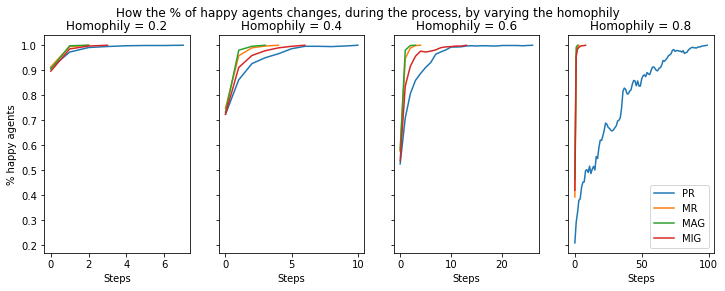

In [43]:
f, ax = plt.subplots(1,4, figsize=(12, 4), sharey = True)

p1 = df1[(df1["homophily"]==homophily_set[0])]

PR = p1[p1["relocation_policy"]=="pure_random"]

MR = p1[p1["relocation_policy"]=="mild_random"]

MAG = p1[p1["relocation_policy"]=="max_gain"]

MIG = p1[p1["relocation_policy"]=="min_gain"]

ax[0].plot(PR.groupby("Step")["perc_happy"].max(),  label='PR')
ax[0].plot(MR.groupby("Step")["perc_happy"].max(), label='MR')
ax[0].plot(MAG.groupby("Step")["perc_happy"].max(), label='MAG')
ax[0].plot(MIG.groupby("Step")["perc_happy"].max(), label='MIG')

ax[0].set_title('Homophily = 0.2')
ax[0].set_ylabel('% happy agents')
ax[0].set_xlabel('Steps')

###############################

p1 = df1[(df1["homophily"]==homophily_set[1])]

PR = p1[p1["relocation_policy"]=="pure_random"]

MR = p1[p1["relocation_policy"]=="mild_random"]

MAG = p1[p1["relocation_policy"]=="max_gain"]

MIG = p1[p1["relocation_policy"]=="min_gain"]

ax[1].plot(PR.groupby("Step")["perc_happy"].max(),  label='PR')
ax[1].plot(MR.groupby("Step")["perc_happy"].max(), label='MR')
ax[1].plot(MAG.groupby("Step")["perc_happy"].max(), label='MAG')
ax[1].plot(MIG.groupby("Step")["perc_happy"].max(), label='MIG')

ax[1].set_title('Homophily = 0.4')
ax[1].set_xlabel('Steps')
###############################

p1 = df1[(df1["homophily"]==homophily_set[2])]

PR = p1[p1["relocation_policy"]=="pure_random"]

MR = p1[p1["relocation_policy"]=="mild_random"]

MAG = p1[p1["relocation_policy"]=="max_gain"]

MIG = p1[p1["relocation_policy"]=="min_gain"]

ax[2].plot(PR.groupby("Step")["perc_happy"].max(),  label='PR')
ax[2].plot(MR.groupby("Step")["perc_happy"].max(), label='MR')
ax[2].plot(MAG.groupby("Step")["perc_happy"].max(), label='MAG')
ax[2].plot(MIG.groupby("Step")["perc_happy"].max(), label='MIG')

ax[2].set_title('Homophily = 0.6')
ax[2].set_xlabel('Steps')
###############################

p1 = df1[(df1["homophily"]==homophily_set[3])]

PR = p1[p1["relocation_policy"]=="pure_random"]

MR = p1[p1["relocation_policy"]=="mild_random"]

MAG = p1[p1["relocation_policy"]=="max_gain"]

MIG = p1[p1["relocation_policy"]=="min_gain"]

ax[3].plot(PR.groupby("Step")["perc_happy"].max(),  label='PR')
ax[3].plot(MR.groupby("Step")["perc_happy"].max(), label='MR')
ax[3].plot(MAG.groupby("Step")["perc_happy"].max(), label='MAG')
ax[3].plot(MIG.groupby("Step")["perc_happy"].max(), label='MIG')

ax[3].set_title('Homophily = 0.8')
ax[3].set_xlabel('Steps')
###############################


f.suptitle('How the % of happy agents changes, during the process, by varying the homophily')
plt.legend()
plt.show()



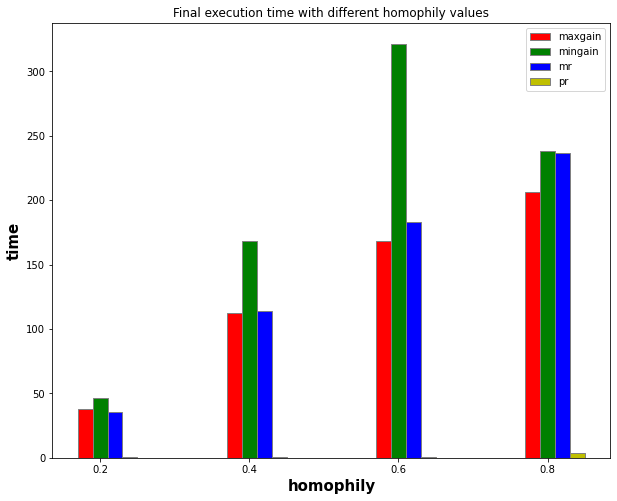

In [29]:
import numpy as np
import matplotlib.pyplot as plt

r = df1.groupby(["homophily","relocation_policy"]).max()[["elapsed_total_time"]]
r


# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(10, 8))

# set height of bar
max_gain = []
mR = []
min_gain = []
pr = []

for hom in homophily_set:
    max_gain.append(r.loc[hom].loc["max_gain"].values[0])
    min_gain.append(r.loc[hom].loc["min_gain"].values[0])
    mR.append(r.loc[hom].loc["mild_random"].values[0])
    pr.append(r.loc[hom].loc["pure_random"].values[0])    


# Set position of bar on X axis
br1 = np.arange(len(homophily_set))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, max_gain, color ='r', width = barWidth,
		edgecolor ='grey', label ='maxgain')
plt.bar(br2, min_gain, color ='g', width = barWidth,
		edgecolor ='grey', label ='mingain')
plt.bar(br3, mR, color ='b', width = barWidth,
		edgecolor ='grey', label ='mr')
plt.bar(br4, pr, color ='y', width = barWidth,
		edgecolor ='grey', label ='pr')


# Adding Xticks
plt.xlabel('homophily', fontweight ='bold', fontsize = 15)
plt.ylabel('time', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(br1))],
		homophily_set)

plt.title("Final execution time with different homophily values")
plt.legend()
plt.show()


**FIXED NEIGHBORHOOD_TYPE-DENSITY-HOMOPHILY-MINORITY, VARY SIDE**

In [108]:
parameters = {"side": [20,40,60], "neighborhood_type":["rel"], "density": [0.6], "homophily": [0.4], 
              "minority_pc":[0.4],"relocation_policy":["pure_random","mild_random","max_gain","min_gain"],
              "skip_if_not_happy":True}


#Run a batch of 10 iterations for each of 8 configuration
results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 1,
    max_steps=200,
    number_processes=8,
    data_collection_period=1,
    display_progress=True,
)
df_ndhm_s = pd.DataFrame(results)
df_ndhm_s.to_csv('df_ndhm_s_2', index=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [12:38<00:00, 63.24s/it]


In [17]:
df2 = pd.read_csv('df_ndhm_s_2.csv')  
df2 = df2.drop(['skip_if_not_happy', 'x','y','iteration', "RunId"], axis=1)
df2

,Step,side,neighborhood_type,density,homophily,minority_pc,relocation_policy,perc_happy,tot_seg,elapsed_step_time,elapsed_total_time,AgentID,segregation
0,0,20,rel,0.6,0.4,0.4,pure_random,0.673387,0.518404,0.013046,0.000000,NaN,NaN
1,1,20,rel,0.6,0.4,0.4,pure_random,0.866935,0.644014,0.000000,0.000000,0.0,1.000000
2,1,20,rel,0.6,0.4,0.4,pure_random,0.866935,0.644014,0.000000,0.000000,1.0,0.000000
3,1,20,rel,0.6,0.4,0.4,pure_random,0.866935,0.644014,0.000000,0.000000,2.0,0.750000
4,1,20,rel,0.6,0.4,0.4,pure_random,0.866935,0.644014,0.000000,0.000000,3.0,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87035,7,60,rel,0.6,0.4,0.4,min_gain,1.000000,0.772164,0.036781,748.042645,2174.0,0.666667
87036,7,60,rel,0.6,0.4,0.4,min_gain,1.000000,0.772164,0.036781,748.042645,2175.0,0.600000
87037,7,60,rel,0.6,0.4,0.4,min_gain,1.000000,0.772164,0.036781,748.042645,2176.0,1.000000
87038,7,60,rel,0.6,0.4,0.4,min_gain,1.000000,0.772164,0.036781,748.042645,2177.0,1.000000


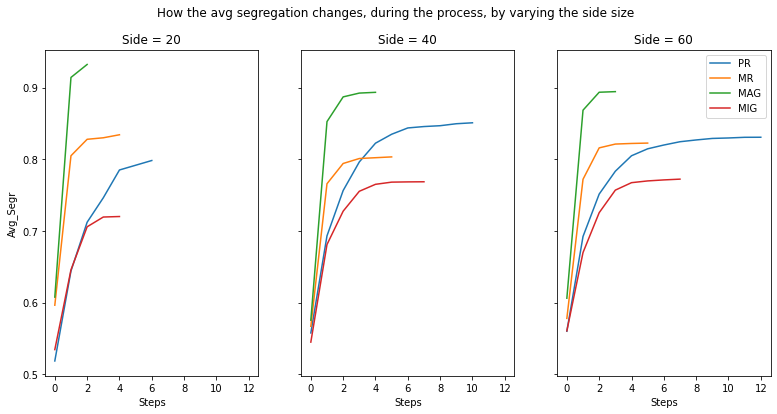

In [35]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(13, 6), sharey = True, sharex = True)

p1 = df2[(df2["side"]==side_set[0])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax1.plot(PR["Step"],PR["tot_seg"],  label='PR')
ax1.plot(MR["Step"], MR["tot_seg"],  label='MR')
ax1.plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax1.plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax1.set_title('Side = 20')
ax1.set_ylabel('Avg_Segr')
ax1.set_xlabel('Steps')
###################################################

p1 = df2[(df2["side"]==side_set[1])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax2.plot(PR["Step"],PR["tot_seg"],  label='PR')
ax2.plot(MR["Step"], MR["tot_seg"],  label='MR')
ax2.plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax2.plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax2.set_title('Side = 40')
ax2.set_xlabel('Steps')
####################################################

p1 = df2[(df2["side"]==side_set[2])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax3.plot(PR["Step"],PR["tot_seg"],  label='PR')
ax3.plot(MR["Step"], MR["tot_seg"],  label='MR')
ax3.plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax3.plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax3.set_title('Side = 60')
ax3.set_xlabel('Steps')


f.suptitle('How the avg segregation changes, during the process, by varying the side size')
plt.legend()

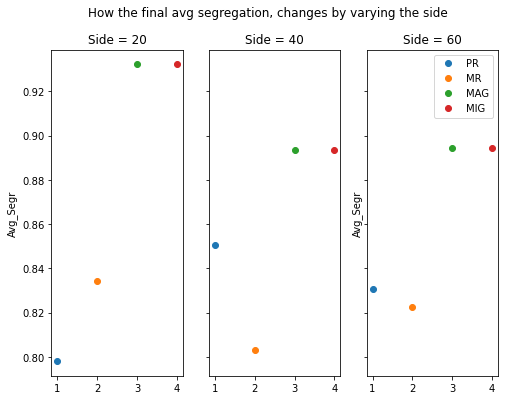

In [36]:
f, ax = plt.subplots(1,3, figsize=(8, 6), sharey = True)

p1 = df2[(df2["side"]==side_set[0])]

PR = p1[p1["relocation_policy"]=="pure_random"]
PR = PR.sort_values(by="Step")
PR.reset_index(drop=True, inplace=True)

MR = p1[p1["relocation_policy"]=="mild_random"]
MR = MR.sort_values(by="Step")
MR.reset_index(drop=True, inplace=True)

MAG = p1[p1["relocation_policy"]=="max_gain"]
MAG = MAG.sort_values(by="Step")
MAG.reset_index(drop=True, inplace=True)

MIG = p1[p1["relocation_policy"]=="min_gain"]
MIG = MIG.sort_values(by="Step")
MIG.reset_index(drop=True, inplace=True)

ax[0].plot(1,PR.iloc[-1]['tot_seg'],'o',  label='PR')
ax[0].plot(2, MR.iloc[-1]['tot_seg'], 'o', label='MR')
ax[0].plot(3,MAG.iloc[-1]['tot_seg'], 'o', label='MAG')
ax[0].plot(4, MAG.iloc[-1]['tot_seg'], 'o', label='MIG')

ax[0].set_title('Side = 20')
ax[0].set_ylabel('Avg_Segr')

###############################


p1 = df2[(df2["side"]==side_set[1])]

PR = p1[p1["relocation_policy"]=="pure_random"]
PR = PR.sort_values(by="Step")
PR.reset_index(drop=True, inplace=True)

MR = p1[p1["relocation_policy"]=="mild_random"]
MR = MR.sort_values(by="Step")
MR.reset_index(drop=True, inplace=True)

MAG = p1[p1["relocation_policy"]=="max_gain"]
MAG = MAG.sort_values(by="Step")
MAG.reset_index(drop=True, inplace=True)

MIG = p1[p1["relocation_policy"]=="min_gain"]
MIG = MIG.sort_values(by="Step")
MIG.reset_index(drop=True, inplace=True)

ax[1].plot(1,PR.iloc[-1]['tot_seg'],'o',  label='PR')
ax[1].plot(2, MR.iloc[-1]['tot_seg'], 'o', label='MR')
ax[1].plot(3,MAG.iloc[-1]['tot_seg'], 'o', label='MAG')
ax[1].plot(4, MAG.iloc[-1]['tot_seg'], 'o', label='MIG')

ax[1].set_title('Side = 40')

######################################################

p1 = df2[(df2["side"]==side_set[2])]

PR = p1[p1["relocation_policy"]=="pure_random"]
PR = PR.sort_values(by="Step")
PR.reset_index(drop=True, inplace=True)

MR = p1[p1["relocation_policy"]=="mild_random"]
MR = MR.sort_values(by="Step")
MR.reset_index(drop=True, inplace=True)

MAG = p1[p1["relocation_policy"]=="max_gain"]
MAG = MAG.sort_values(by="Step")
MAG.reset_index(drop=True, inplace=True)

MIG = p1[p1["relocation_policy"]=="min_gain"]
MIG = MIG.sort_values(by="Step")
MIG.reset_index(drop=True, inplace=True)

ax[2].plot(1,PR.iloc[-1]['tot_seg'],'o',  label='PR')
ax[2].plot(2, MR.iloc[-1]['tot_seg'], 'o', label='MR')
ax[2].plot(3,MAG.iloc[-1]['tot_seg'], 'o', label='MAG')
ax[2].plot(4, MAG.iloc[-1]['tot_seg'], 'o', label='MIG')

ax[2].set_title('Side = 60')
ax[2].set_ylabel('Avg_Segr')
########################################################


f.suptitle('How the final avg segregation, changes by varying the side')
plt.legend()
plt.show()


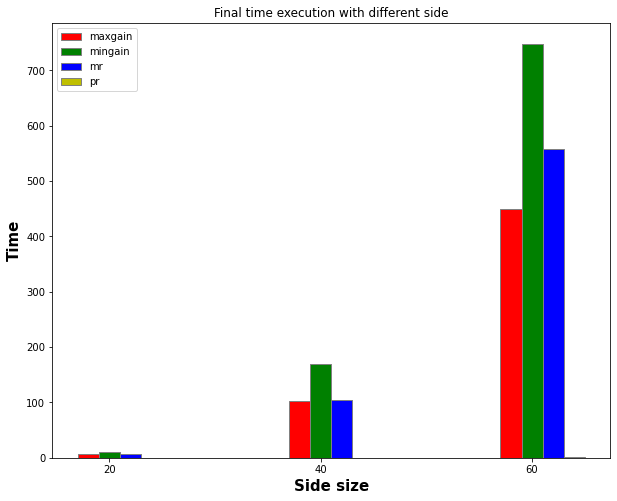

In [64]:
import numpy as np
import matplotlib.pyplot as plt

r = df2.groupby(["side","relocation_policy"]).max()[["elapsed_total_time"]]
r


# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(10, 8))

# set height of bar
max_gain = []
mR = []
min_gain = []
pr = []

for side in side_set:
    max_gain.append(r.loc[side].loc["max_gain"].values[0])
    min_gain.append(r.loc[side].loc["min_gain"].values[0])
    mR.append(r.loc[side].loc["mild_random"].values[0])
    pr.append(r.loc[side].loc["pure_random"].values[0])    


# Set position of bar on X axis
br1 = np.arange(len(side_set))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, max_gain, color ='r', width = barWidth,
		edgecolor ='grey', label ='maxgain')
plt.bar(br2, min_gain, color ='g', width = barWidth,
		edgecolor ='grey', label ='mingain')
plt.bar(br3, mR, color ='b', width = barWidth,
		edgecolor ='grey', label ='mr')
plt.bar(br4, pr, color ='y', width = barWidth,
		edgecolor ='grey', label ='pr')


# Adding Xticks
plt.xlabel('Side size', fontweight ='bold', fontsize = 15)
plt.ylabel('Time', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(br1))],
		side_set)

plt.title("Final time execution with different side")
plt.legend()
plt.show()


**FIXED SIDE-DENSITY-HOMOPHILY-MINORITY, VARY NEIGHBORHOOD_TYPE**

In [109]:
parameters = {"side": [40], "neighborhood_type":["abs","rel"], "density": [0.6], "homophily": [0.4], 
              "minority_pc":[0.4],"relocation_policy":["pure_random","mild_random","max_gain","min_gain"],
              "skip_if_not_happy":True}


#Run a batch of 10 iterations for each of 8 configuration
results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 1,
    max_steps=200,
    number_processes=8,
    data_collection_period=1,
    display_progress=True,
)
df_sdhm_n = pd.DataFrame(results)
df_sdhm_n.to_csv('df_sdhm_n_2', index=False)

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [28:58<00:00, 217.31s/it]


In [38]:
df3 = pd.read_csv('df_sdhm_n_2.csv')  
df3 = df3.drop(['skip_if_not_happy', 'x','y','iteration', "RunId"], axis=1)
df3

,Step,side,neighborhood_type,density,homophily,minority_pc,relocation_policy,perc_happy,tot_seg,elapsed_step_time,elapsed_total_time,AgentID,segregation
0,0,40,rel,0.6,0.4,0.4,pure_random,0.749480,0.564677,0.078534,0.000000,NaN,NaN
1,1,40,rel,0.6,0.4,0.4,pure_random,0.879418,0.697494,0.028196,0.000000,0.0,0.000
2,1,40,rel,0.6,0.4,0.4,pure_random,0.879418,0.697494,0.028196,0.000000,1.0,0.500
3,1,40,rel,0.6,0.4,0.4,pure_random,0.879418,0.697494,0.028196,0.000000,2.0,0.400
4,1,40,rel,0.6,0.4,0.4,pure_random,0.879418,0.697494,0.028196,0.000000,3.0,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599980,200,40,abs,0.6,0.4,0.4,mild_random,0.976017,0.817518,7.808764,1718.456315,954.0,1.000
599981,200,40,abs,0.6,0.4,0.4,mild_random,0.976017,0.817518,7.808764,1718.456315,955.0,0.875
599982,200,40,abs,0.6,0.4,0.4,mild_random,0.976017,0.817518,7.808764,1718.456315,956.0,0.500
599983,200,40,abs,0.6,0.4,0.4,mild_random,0.976017,0.817518,7.808764,1718.456315,957.0,0.625


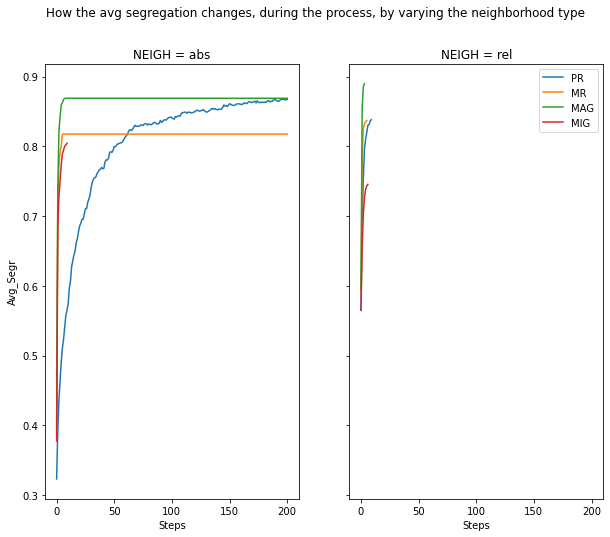

In [40]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 8), sharey = True, sharex = True)

p1 = df3[(df3["neighborhood_type"]==neighborhood_set[0])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax1.plot(PR["Step"],PR["tot_seg"],  label='PR')
ax1.plot(MR["Step"], MR["tot_seg"],  label='MR')
ax1.plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax1.plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax1.set_title('NEIGH = abs')
ax1.set_ylabel('Avg_Segr')
ax1.set_xlabel('Steps')

###################################################

p1 = df3[(df3["neighborhood_type"]==neighborhood_set[1])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax2.plot(PR["Step"],PR["tot_seg"],  label='PR')
ax2.plot(MR["Step"], MR["tot_seg"],  label='MR')
ax2.plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax2.plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax2.set_title('NEIGH = rel')
ax2.set_xlabel('Steps')


f.suptitle('How the avg segregation changes, during the process, by varying the neighborhood type')
plt.legend()

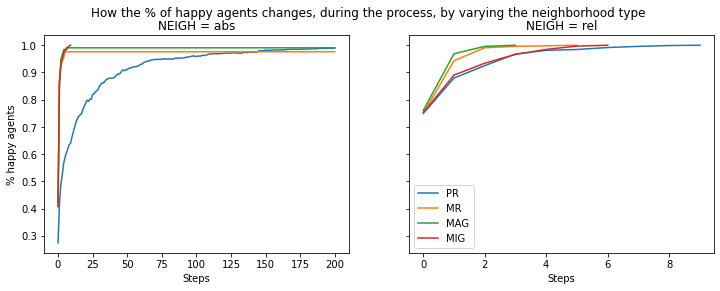

In [45]:
f, ax = plt.subplots(1,2, figsize=(12, 4), sharey = True)

p1 = df3[(df3["neighborhood_type"]=="abs")]

PR = p1[p1["relocation_policy"]=="pure_random"]

MR = p1[p1["relocation_policy"]=="mild_random"]

MAG = p1[p1["relocation_policy"]=="max_gain"]

MIG = p1[p1["relocation_policy"]=="min_gain"]

ax[0].plot(PR.groupby("Step")["perc_happy"].max(),  label='PR')
ax[0].plot(MR.groupby("Step")["perc_happy"].max(), label='MR')
ax[0].plot(MAG.groupby("Step")["perc_happy"].max(), label='MAG')
ax[0].plot(MIG.groupby("Step")["perc_happy"].max(), label='MIG')

ax[0].set_title('NEIGH = abs')
ax[0].set_ylabel('% happy agents')
ax[0].set_xlabel('Steps')

###############################

p1 = df3[(df3["neighborhood_type"]=="rel")]

PR = p1[p1["relocation_policy"]=="pure_random"]

MR = p1[p1["relocation_policy"]=="mild_random"]

MAG = p1[p1["relocation_policy"]=="max_gain"]

MIG = p1[p1["relocation_policy"]=="min_gain"]

ax[1].plot(PR.groupby("Step")["perc_happy"].max(),  label='PR')
ax[1].plot(MR.groupby("Step")["perc_happy"].max(), label='MR')
ax[1].plot(MAG.groupby("Step")["perc_happy"].max(), label='MAG')
ax[1].plot(MIG.groupby("Step")["perc_happy"].max(), label='MIG')

ax[1].set_title('NEIGH = rel')
ax[1].set_xlabel('Steps')

f.suptitle('How the % of happy agents changes, during the process, by varying the neighborhood type')
plt.legend()
plt.show()



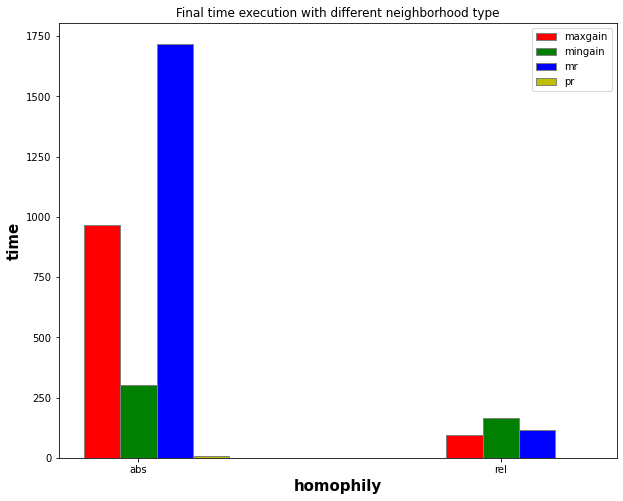

In [48]:
import numpy as np
import matplotlib.pyplot as plt

r = df3.groupby(["neighborhood_type","relocation_policy"]).max()[["elapsed_total_time"]]
r


# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(10, 8))

# set height of bar
max_gain = []
mR = []
min_gain = []
pr = []

for neighborhood in neighborhood_set:
    max_gain.append(r.loc[neighborhood].loc["max_gain"].values[0])
    min_gain.append(r.loc[neighborhood].loc["min_gain"].values[0])
    mR.append(r.loc[neighborhood].loc["mild_random"].values[0])
    pr.append(r.loc[neighborhood].loc["pure_random"].values[0])    


# Set position of bar on X axis
br1 = np.arange(len(neighborhood_set))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, max_gain, color ='r', width = barWidth,
		edgecolor ='grey', label ='maxgain')
plt.bar(br2, min_gain, color ='g', width = barWidth,
		edgecolor ='grey', label ='mingain')
plt.bar(br3, mR, color ='b', width = barWidth,
		edgecolor ='grey', label ='mr')
plt.bar(br4, pr, color ='y', width = barWidth,
		edgecolor ='grey', label ='pr')


# Adding Xticks
plt.xlabel('homophily', fontweight ='bold', fontsize = 15)
plt.ylabel('time', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(br1))],
		neighborhood_set)

plt.title("Final time execution with different neighborhood type")
plt.legend()
plt.show()


**FIXED SIDE-NEIGHBORHOOD-HOMOPHILY-MINORITY, VARY DENSITY**

In [110]:
parameters = {"side": [40], "neighborhood_type":["rel"], "density": [0.2, 0.4,0.6,0.8], "homophily": [0.4], 
              "minority_pc":[0.4],"relocation_policy":["pure_random","mild_random","max_gain","min_gain"],
              "skip_if_not_happy":True}


results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 1,
    max_steps=200,
    number_processes=8,
    data_collection_period=1,
    display_progress=True,
)
df_snhm_d = pd.DataFrame(results)
df_snhm_d.to_csv('df_snhm_d_2', index=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [05:02<00:00, 18.88s/it]


In [49]:
df4 = pd.read_csv('df_snhm_d_2.csv')  
df4 = df4.drop(['skip_if_not_happy', 'x','y','iteration', "RunId"], axis=1)
df4

,Step,side,neighborhood_type,density,homophily,minority_pc,relocation_policy,perc_happy,tot_seg,elapsed_step_time,elapsed_total_time,AgentID,segregation
0,0,40,rel,0.2,0.4,0.4,pure_random,0.540625,0.474844,0.031848,0.000000,NaN,NaN
1,1,40,rel,0.2,0.4,0.4,pure_random,0.765625,0.682240,0.010708,0.000000,0.0,0.000000
2,1,40,rel,0.2,0.4,0.4,pure_random,0.765625,0.682240,0.010708,0.000000,1.0,0.666667
3,1,40,rel,0.2,0.4,0.4,pure_random,0.765625,0.682240,0.010708,0.000000,2.0,0.000000
4,1,40,rel,0.2,0.4,0.4,pure_random,0.765625,0.682240,0.010708,0.000000,3.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85920,10,40,rel,0.6,0.4,0.4,min_gain,1.000000,0.776918,0.019505,197.531538,946.0,0.666667
85921,10,40,rel,0.6,0.4,0.4,min_gain,1.000000,0.776918,0.019505,197.531538,947.0,0.500000
85922,10,40,rel,0.6,0.4,0.4,min_gain,1.000000,0.776918,0.019505,197.531538,948.0,1.000000
85923,10,40,rel,0.6,0.4,0.4,min_gain,1.000000,0.776918,0.019505,197.531538,949.0,1.000000


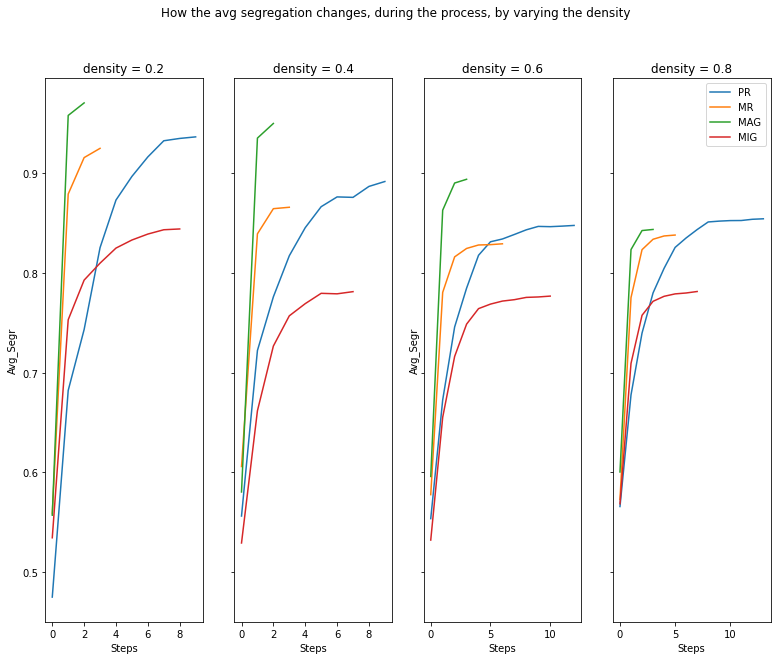

In [52]:
f, ax = plt.subplots(1,4, figsize=(13, 10), sharey = True)

p1 = df4[(df4["density"]==density_set[0])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[0].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[0].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[0].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[0].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[0].set_title('density = 0.2')
ax[0].set_ylabel('Avg_Segr')
ax[0].set_xlabel('Steps')
###################################################

p1 = df4[(df4["density"]==density_set[1])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[1].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[1].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[1].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[1].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[1].set_title('density = 0.4')
ax[1].set_xlabel('Steps')
####################################################

p1 = df4[(df4["density"]==density_set[2])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[2].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[2].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[2].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[2].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[2].set_title('density = 0.6')
ax[2].set_xlabel('Steps')
ax[2].set_ylabel('Avg_Segr')
#################################################

p1 = df4[(df4["density"]==density_set[3])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[3].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[3].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[3].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[3].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[3].set_title('density = 0.8')
ax[3].set_xlabel('Steps')

f.suptitle('How the avg segregation changes, during the process, by varying the density')
plt.legend()

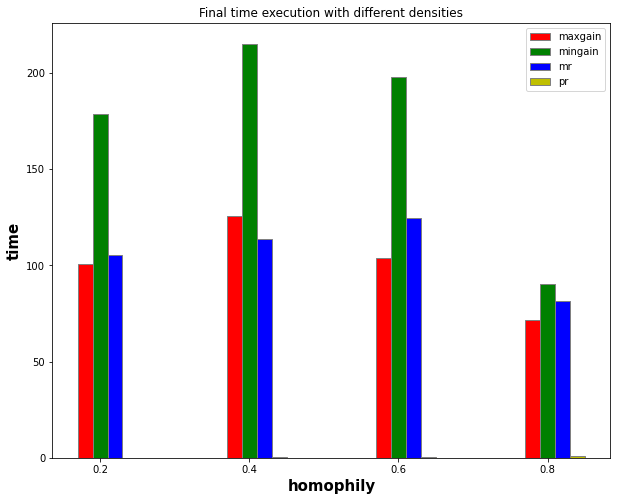

In [63]:
import numpy as np
import matplotlib.pyplot as plt

r = df4.groupby(["density","relocation_policy"]).max()[["elapsed_total_time"]]
r


# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(10, 8))

# set height of bar
max_gain = []
mR = []
min_gain = []
pr = []

for density in density_set:
    max_gain.append(r.loc[density].loc["max_gain"].values[0])
    min_gain.append(r.loc[density].loc["min_gain"].values[0])
    mR.append(r.loc[density].loc["mild_random"].values[0])
    pr.append(r.loc[density].loc["pure_random"].values[0])    


# Set position of bar on X axis
br1 = np.arange(len(density_set))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, max_gain, color ='r', width = barWidth,
		edgecolor ='grey', label ='maxgain')
plt.bar(br2, min_gain, color ='g', width = barWidth,
		edgecolor ='grey', label ='mingain')
plt.bar(br3, mR, color ='b', width = barWidth,
		edgecolor ='grey', label ='mr')
plt.bar(br4, pr, color ='y', width = barWidth,
		edgecolor ='grey', label ='pr')


# Adding Xticks
plt.xlabel('homophily', fontweight ='bold', fontsize = 15)
plt.ylabel('time', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(br1))],
		density_set)


plt.title("Final time execution with different densities")
plt.legend()
plt.show()


**FIXED SIDE-NEIGHBORHOOD_TYPE-DENSITY-HOMOPHILY, VARY MINORITY**

In [111]:
parameters = {"side": [40], "neighborhood_type":["rel"], "density": [0.6], "homophily": [0.4], 
              "minority_pc":[0.2,0.4,0.6,0.8],"relocation_policy":["pure_random","mild_random","max_gain","min_gain"],
              "skip_if_not_happy":True}


#Run a batch of 10 iterations for each of 8 configuration
results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 1,
    max_steps=200,
    number_processes=8,
    data_collection_period=1,
    display_progress=True,
)
df_sndh_m = pd.DataFrame(results)
df_sndh_m.to_csv('df_sndh_m_2', index=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [03:46<00:00, 14.13s/it]


In [55]:
df5 = pd.read_csv('df_sndh_m_2.csv')  
df5 = df5.drop(['skip_if_not_happy', 'x','y','iteration', "RunId"], axis=1)
df5

,Step,side,neighborhood_type,density,homophily,minority_pc,relocation_policy,perc_happy,tot_seg,elapsed_step_time,elapsed_total_time,AgentID,segregation
0,0,40,rel,0.6,0.4,0.4,pure_random,0.755946,0.571778,0.067538,0.000000,NaN,NaN
1,1,40,rel,0.6,0.4,0.4,pure_random,0.879007,0.681998,0.039972,0.000000,0.0,1.000000
2,1,40,rel,0.6,0.4,0.4,pure_random,0.879007,0.681998,0.039972,0.000000,1.0,0.500000
3,1,40,rel,0.6,0.4,0.4,pure_random,0.879007,0.681998,0.039972,0.000000,2.0,0.400000
4,1,40,rel,0.6,0.4,0.4,pure_random,0.879007,0.681998,0.039972,0.000000,3.0,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124600,6,40,rel,0.6,0.4,0.6,min_gain,1.000000,0.773693,0.020327,160.515609,966.0,0.666667
124601,6,40,rel,0.6,0.4,0.6,min_gain,1.000000,0.773693,0.020327,160.515609,967.0,0.750000
124602,6,40,rel,0.6,0.4,0.6,min_gain,1.000000,0.773693,0.020327,160.515609,968.0,0.600000
124603,6,40,rel,0.6,0.4,0.6,min_gain,1.000000,0.773693,0.020327,160.515609,969.0,0.500000


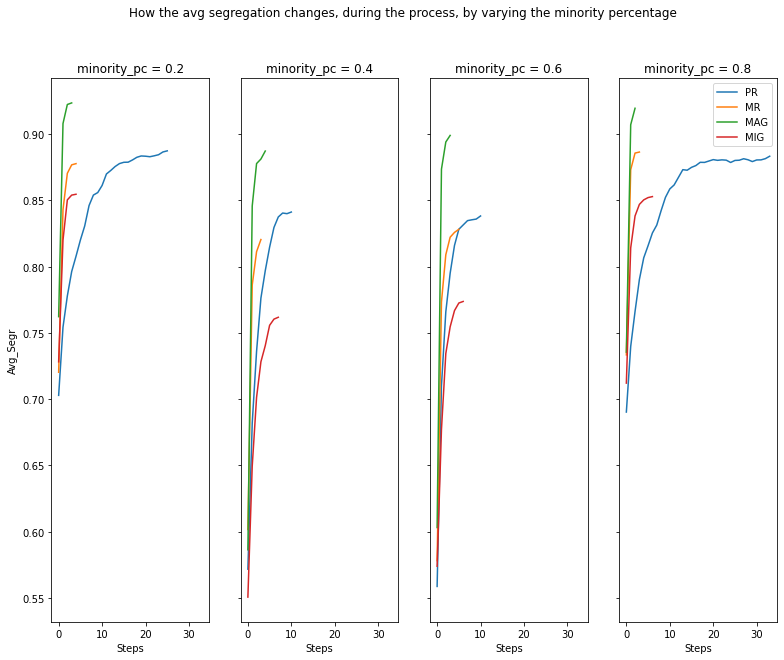

In [60]:
f, ax = plt.subplots(1,4, figsize=(13, 10), sharey = True, sharex = True)

p1 = df5[(df5["minority_pc"]==minority_set[0])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[0].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[0].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[0].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[0].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[0].set_title('minority_pc = 0.2')
ax[0].set_xlabel('Steps')
ax[0].set_ylabel('Avg_Segr')
###################################################

p1 = df5[(df5["minority_pc"]==minority_set[1])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[1].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[1].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[1].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[1].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[1].set_title('minority_pc = 0.4')
ax[1].set_xlabel('Steps')
####################################################

p1 = df5[(df5["minority_pc"]==minority_set[2])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[2].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[2].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[2].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[2].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[2].set_title('minority_pc = 0.6')
ax[2].set_xlabel('Steps')
#################################################

p1 = df5[(df5["minority_pc"]==minority_set[3])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[3].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[3].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[3].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[3].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[3].set_title('minority_pc = 0.8')
ax[3].set_xlabel('Steps')


f.suptitle('How the avg segregation changes, during the process, by varying the minority percentage')
plt.legend()

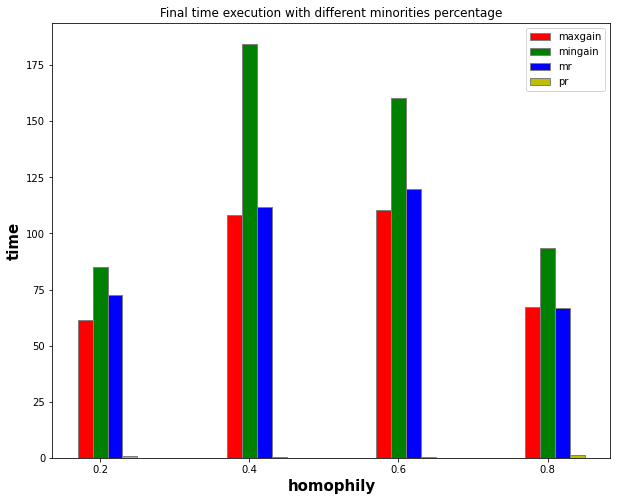

In [62]:
import numpy as np
import matplotlib.pyplot as plt

r = df5.groupby(["minority_pc","relocation_policy"]).max()[["elapsed_total_time"]]
r


# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(10, 8))

# set height of bar
max_gain = []
mR = []
min_gain = []
pr = []

for minority_pc in minority_set:
    max_gain.append(r.loc[minority_pc].loc["max_gain"].values[0])
    min_gain.append(r.loc[minority_pc].loc["min_gain"].values[0])
    mR.append(r.loc[minority_pc].loc["mild_random"].values[0])
    pr.append(r.loc[minority_pc].loc["pure_random"].values[0])    

# Set position of bar on X axis
br1 = np.arange(len(minority_set))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, max_gain, color ='r', width = barWidth,
		edgecolor ='grey', label ='maxgain')
plt.bar(br2, min_gain, color ='g', width = barWidth,
		edgecolor ='grey', label ='mingain')
plt.bar(br3, mR, color ='b', width = barWidth,
		edgecolor ='grey', label ='mr')
plt.bar(br4, pr, color ='y', width = barWidth,
		edgecolor ='grey', label ='pr')


# Adding Xticks
plt.xlabel('homophily', fontweight ='bold', fontsize = 15)
plt.ylabel('time', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(br1))],
		minority_set)


plt.title("Final time execution with different minorities percentage")
plt.legend()
plt.show()
